# Poincare diagram example

In [3]:
import sys
sys.path.append('..')

In [8]:
import biosppy
import pyhrv
from pyhrv.nonlinear import poincare
from preprocess.utils import load_mat

## Long

In [9]:
# fig, ax = plt.subplots()
data = load_mat("/home/huypham/Projects/ecg/dataset/cinc2020/raw/training/st_petersburg_incart/g1/I0017.mat")
_, rpeaks = biosppy.signals.ecg.ecg(data[0, :], sampling_rate=257, show=False)[1:3]
nn = pyhrv.tools.nn_intervals(rpeaks)
# poincare(nni=nni)

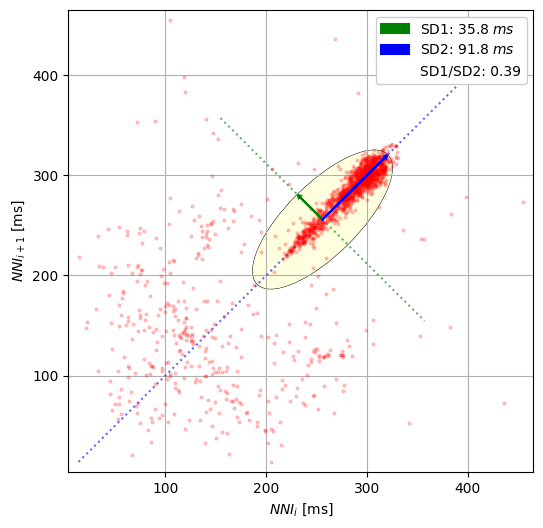

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

marker='o'
figsize = (6, 6)


# Prepare Poincaré data
x1 = np.asarray(nn[:-1])
x2 = np.asarray(nn[1:])

# SD1 & SD2 Computation
sd1 = np.std(np.subtract(x1, x2) / np.sqrt(2))
sd2 = np.std(np.add(x1, x2) / np.sqrt(2))

# Area of ellipse
area = np.pi * sd1 * sd2

# Normal:
# Same as dev but with plot
fig = plt.figure(figsize=figsize)
fig.tight_layout()
ax = fig.add_subplot(111)

# ax.set_title(r'$Poincar\acute{e}$')
ax.set_ylabel('$NNI_{i+1}$ [ms]')
ax.set_xlabel('$NNI_i$ [ms]')
ax.set_xlim([np.min(nn) - 10, np.max(nn) + 10])
ax.set_ylim([np.min(nn) - 10, np.max(nn) + 10])
ax.grid()
ax.plot(x1, x2, 'r%s' % marker, markersize=2, alpha=0.2, zorder=3)

# Compute mean NNI (center of the Poincaré plot)
nn_mean = np.mean(nn)

# Draw poincaré ellipse
ellipse_ = mpl.patches.Ellipse((nn_mean, nn_mean), sd1 * 2, sd2 * 2, angle=-45, fc='k', zorder=1)
ax.add_artist(ellipse_)
ellipse_ = mpl.patches.Ellipse((nn_mean, nn_mean), sd1 * 2 - 1, sd2 * 2 - 1, angle=-45, fc='lightyellow', zorder=1)
ax.add_artist(ellipse_)

# Add poincaré vectors (SD1 & SD2)
arrow_head_size = 3
na = 4
a1 = ax.arrow(
	nn_mean, nn_mean, (-sd1 + na) * np.cos(np.deg2rad(45)), (sd1 - na) * np.sin(np.deg2rad(45)),
	head_width=arrow_head_size, head_length=arrow_head_size, fc='g', ec='g', zorder=4, linewidth=1.5)
a2 = ax.arrow(
	nn_mean, nn_mean, (sd2 - na) * np.cos(np.deg2rad(45)), (sd2 - na) * np.sin(np.deg2rad(45)),
	head_width=arrow_head_size, head_length=arrow_head_size, fc='b', ec='b', zorder=4, linewidth=1.5)
a3 = mpl.patches.Patch(facecolor='white', alpha=0.0)
a4 = mpl.patches.Patch(facecolor='white', alpha=0.0)
ax.add_line(mpl.lines.Line2D(
	(min(nn), max(nn)),
	(min(nn), max(nn)),
	c='b', ls=':', alpha=0.6))
ax.add_line(mpl.lines.Line2D(
	(nn_mean - sd1 * np.cos(np.deg2rad(45)) * na, nn_mean + sd1 * np.cos(np.deg2rad(45)) * na),
	(nn_mean + sd1 * np.sin(np.deg2rad(45)) * na, nn_mean - sd1 * np.sin(np.deg2rad(45)) * na),
	c='g', ls=':', alpha=0.6))

# Add legend
ax.legend(
	[a1, a2, a3, a4],
	['SD1: %.1f $ms$' % sd1, 'SD2: %.1f $ms$' % sd2, 'SD1/SD2: %.2f' % (sd1/sd2)], #  'S: %.3f$ms^2$' % area
	framealpha=1,
	loc='upper right'
)

fig.savefig('short_poincare.pdf', dpi=300, bbox_inches='tight')

## Short

In [11]:
!cat /home/huypham/Projects/ecg/dataset/cinc2020/raw/training/ptb/g1/S0001.hea

S0001 12 1000 38400
S0001.mat 16x1+24 1000.0(0)/mv 16 0 -245 -3730 0 I
S0001.mat 16x1+24 1000.0(0)/mv 16 0 -229 -8032 0 II
S0001.mat 16x1+24 1000.0(0)/mv 16 0 16 4606 0 III
S0001.mat 16x1+24 1000.0(0)/mv 16 0 237 781 0 aVR
S0001.mat 16x1+24 1000.0(0)/mv 16 0 -130 4144 0 aVL
S0001.mat 16x1+24 1000.0(0)/mv 16 0 -107 -8157 0 aVF
S0001.mat 16x1+24 1000.0(0)/mv 16 0 -44 -9547 0 V1
S0001.mat 16x1+24 1000.0(0)/mv 16 0 -121 1335 0 V2
S0001.mat 16x1+24 1000.0(0)/mv 16 0 -56 -7472 0 V3
S0001.mat 16x1+24 1000.0(0)/mv 16 0 106 -7233 0 V4
S0001.mat 16x1+24 1000.0(0)/mv 16 0 197 -1491 0 V5
S0001.mat 16x1+24 1000.0(0)/mv 16 0 195 -7532 0 V6
# Age: 81
# Sex: Female
# Dx: 164865005
# Rx: Unknown
# Hx: Unknown


In [12]:
# fig, ax = plt.subplots()
data = load_mat("/home/huypham/Projects/ecg/dataset/cinc2020/raw/training/ptb/g1/S0001.mat")
_, rpeaks = biosppy.signals.ecg.ecg(data[0, :], sampling_rate=257, show=False)[1:3]
nn = pyhrv.tools.nn_intervals(rpeaks)
# poincare(nni=nni)

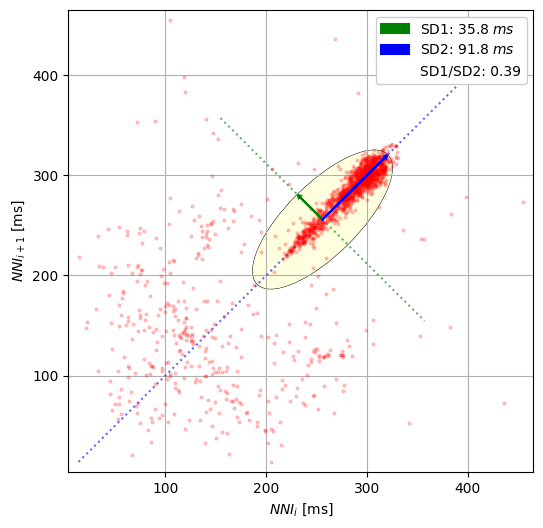

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

marker='o'
figsize = (6, 6)


# Prepare Poincaré data
x1 = np.asarray(nn[:-1])
x2 = np.asarray(nn[1:])

# SD1 & SD2 Computation
sd1 = np.std(np.subtract(x1, x2) / np.sqrt(2))
sd2 = np.std(np.add(x1, x2) / np.sqrt(2))

# Area of ellipse
area = np.pi * sd1 * sd2

# Normal:
# Same as dev but with plot
fig = plt.figure(figsize=figsize)
fig.tight_layout()
ax = fig.add_subplot(111)

# ax.set_title(r'$Poincar\acute{e}$')
ax.set_ylabel('$NNI_{i+1}$ [ms]')
ax.set_xlabel('$NNI_i$ [ms]')
ax.set_xlim([np.min(nn) - 10, np.max(nn) + 10])
ax.set_ylim([np.min(nn) - 10, np.max(nn) + 10])
ax.grid()
ax.plot(x1, x2, 'r%s' % marker, markersize=2, alpha=0.2, zorder=3)

# Compute mean NNI (center of the Poincaré plot)
nn_mean = np.mean(nn)

# Draw poincaré ellipse
ellipse_ = mpl.patches.Ellipse((nn_mean, nn_mean), sd1 * 2, sd2 * 2, angle=-45, fc='k', zorder=1)
ax.add_artist(ellipse_)
ellipse_ = mpl.patches.Ellipse((nn_mean, nn_mean), sd1 * 2 - 1, sd2 * 2 - 1, angle=-45, fc='lightyellow', zorder=1)
ax.add_artist(ellipse_)

# Add poincaré vectors (SD1 & SD2)
arrow_head_size = 3
na = 4
a1 = ax.arrow(
	nn_mean, nn_mean, (-sd1 + na) * np.cos(np.deg2rad(45)), (sd1 - na) * np.sin(np.deg2rad(45)),
	head_width=arrow_head_size, head_length=arrow_head_size, fc='g', ec='g', zorder=4, linewidth=1.5)
a2 = ax.arrow(
	nn_mean, nn_mean, (sd2 - na) * np.cos(np.deg2rad(45)), (sd2 - na) * np.sin(np.deg2rad(45)),
	head_width=arrow_head_size, head_length=arrow_head_size, fc='b', ec='b', zorder=4, linewidth=1.5)
a3 = mpl.patches.Patch(facecolor='white', alpha=0.0)
a4 = mpl.patches.Patch(facecolor='white', alpha=0.0)
ax.add_line(mpl.lines.Line2D(
	(min(nn), max(nn)),
	(min(nn), max(nn)),
	c='b', ls=':', alpha=0.6))
ax.add_line(mpl.lines.Line2D(
	(nn_mean - sd1 * np.cos(np.deg2rad(45)) * na, nn_mean + sd1 * np.cos(np.deg2rad(45)) * na),
	(nn_mean + sd1 * np.sin(np.deg2rad(45)) * na, nn_mean - sd1 * np.sin(np.deg2rad(45)) * na),
	c='g', ls=':', alpha=0.6))

# Add legend
ax.legend(
	[a1, a2, a3, a4],
	['SD1: %.1f $ms$' % sd1, 'SD2: %.1f $ms$' % sd2, 'SD1/SD2: %.2f' % (sd1/sd2)], #  'S: %.3f$ms^2$' % area
	framealpha=1,
	loc='upper right'
)

fig.savefig('short_poincare.pdf', dpi=300, bbox_inches='tight')